In [1]:
from metal.nn import NeuralNetwork
from metal.utils import train_test_split, to_categorical, normalize
from metal.utils import get_random_subsets, shuffle_data, Plot
from metal.utils.data_operation import accuracy_score
from metal.optimizers import StochasticGradientDescent,Adam
from metal.loss_functions import CrossEntropy
from metal.utils.misc import bar_widgets
from metal.layers.dense import Dense
from metal.layers.conv2D import Conv2D
from metal.layers.flatten import Flatten
from metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from metal.models.convnet import ConvNet
import h5py

In [2]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np


In [18]:
optimizer = Adam()
data = datasets.load_digits()
X = data.data
y = data.target
loss = CrossEntropy

# Covnet to  one-hot encoding 
y = to_categorical(y.astype("int"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)

X_train = X_train.reshape((-1,1,8,8))
X_test = X_test.reshape((-1,1,8,8))

X_train = Parameter(X_train, requires_grad=True)
X_test = Parameter(X_test, requires_grad=True)
y_train = Parameter(y_train, requires_grad=True)
y_test = Parameter(y_test, requires_grad=True)

In [19]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))

In [20]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,8,8), padding='same', seed=1))
covnet.add(Activation('relu'))
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,8,8), padding='same', seed=2))
covnet.add(Flatten())
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [21]:
train_err, val_err = covnet.fit(X_train, y_train, n_epochs=50, batch_size=256)


Training: 100% [------------------------------------------------] Time: 0:00:56


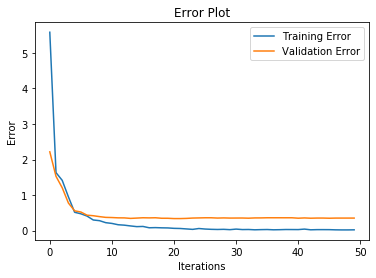

Accuracy: 0.9568245125348189


In [22]:
covnet.eval(X_test, y_test)

In [15]:
data_ = X_test[3].reshape(1,1,8,8)
plt.figure(figsize=(5,5))
plt.imshow(data_.data.reshape(data_.shape[-1],data_.shape[-2]), interpolation='lanczos')
plt.show()

In [9]:
covnet.predict(data_)

3